In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
data = pd.read_csv("student-por.csv", sep=';')  # Portuguese student performance data

In [11]:
# Display basic information about the dataset
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int32
 1   sex         649 non-null    int32
 2   age         649 non-null    int64
 3   address     649 non-null    int32
 4   famsize     649 non-null    int32
 5   Pstatus     649 non-null    int32
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int32
 9   Fjob        649 non-null    int32
 10  reason      649 non-null    int32
 11  guardian    649 non-null    int32
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int32
 16  famsup      649 non-null    int32
 17  paid        649 non-null    int32
 18  activities  649 non-null    int32
 19  nursery     649 non-null    int32
 20  higher      649 non-null    int3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# Data Preprocessing
# Label Encoding for categorical columns
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [6]:
# Define the target (final grade G3) and features
X = data.drop(['G3'], axis=1)  # Features
y = data['G3']  # Target (final grade)

In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [8]:
# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [9]:
# Evaluate the model (using Mean Squared Error as the metric)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.548326923076923


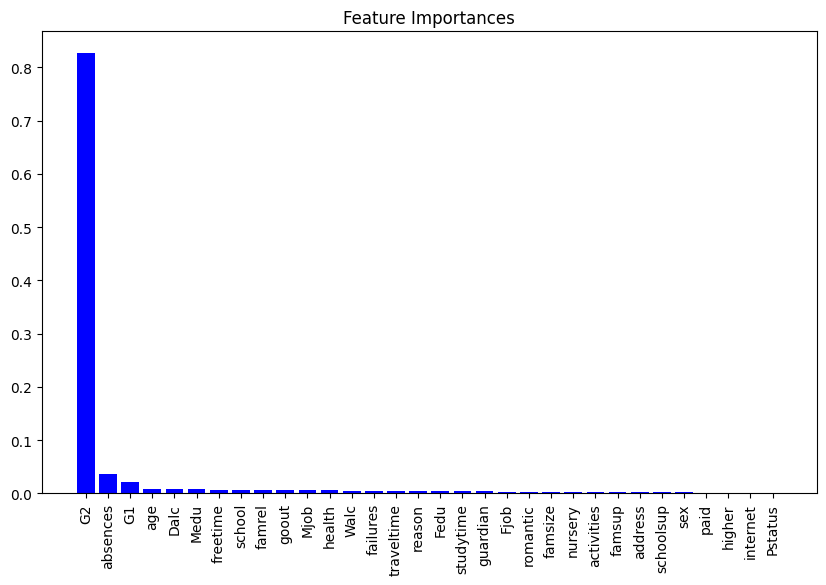

In [10]:
# Feature Importance (optional - helps understand which features contributed most)
importances = model.feature_importances_
indices = sorted(range(len(importances)), key=lambda k: importances[k], reverse=True)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()